# Data Preprocessing  

Prepocessing merupakan suatu proses dalam Bussiness Understanding, yang berfungsi untuk menyiapkan data agar ketika dalam proses modelling mendapatkan nilai akurasi yang maksimal, diantara prosess prepocessing yakni penghapusan outlier dan pemberian data pada kolom yang missing value.  

## Deteksi Oulier Menggunakan Data Iris di Power BI  

Pada Power BI, pergi ke menu Transform Data -> Transform -> Run Python Script  

### Model Deteksi Outlier ABOD  

Teknik ini didasarkan pada gagasan untuk mengawasi sudut yang dibentuk oleh sekumpulan tiga titik data dalam ruang fitur multivariat. Teknik outlier berbasis sudut (ABOD) bekerja cukup baik dalam ruang berdimensi tinggi.  

Berikut Contoh Code Implementasi model ABOD pada data Iris:  

In [1]:
import pandas as pd
from pycaret.anomaly import *

dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

abod_data = setup(data, session_id=123, normalize=True)
abod = create_model('abod')
abod_predictions = assign_model(abod)

data_anomaly = abod_predictions[abod_predictions['Anomaly'] == 1]
print(data_anomaly)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


      id            class  petallength  petalwidth  sepallength  sepalwidth  \
15    16      Iris-setosa          1.5         0.4          5.7         4.4   
41    42      Iris-setosa          1.3         0.3          4.5         2.3   
60    61  Iris-versicolor          3.5         1.0          5.0         2.0   
85    86  Iris-versicolor          4.5         1.6          6.0         3.4   
106  107   Iris-virginica          4.5         1.7          4.9         2.5   
108  109   Iris-virginica          5.8         1.8          6.7         2.5   
119  120   Iris-virginica          5.0         1.5          6.0         2.2   
146  147   Iris-virginica          5.0         1.9          6.3         2.5   

     Anomaly  Anomaly_Score  
15         1      -0.039029  
41         1      -0.000656  
60         1      -0.011186  
85         1      -0.074980  
106        1      -0.021686  
108        1      -0.082458  
119        1      -0.009325  
146        1      -0.069114  


Penjelasan code:  

- Pertama import library yang akan digunakan seperti pandas dan pycaret.
- Load dataset menggunakan method copy().
- Persiapkan model pycaret menggunakan fungsi setup() yang di dalamnya berisi parameter berupa data dan session_id.
- Gunakan model ‘abod’ menggunakan fungsi create_model().
- Setelah itu, terapkan model menggunakan fungsi assign_model().
- Seleksi data oulier melalui pengaksesan indeks nilai kolom yang memiliki nilai = 1, sebab outlier direpresentasikan dengan nilai 1.
- Muat data outlier pada Power BI dengan menuliskan kembali variabel yang menyimpan proses seperti ‘data_anomaly’.

Hasil Pendeteksian Outlier Pada Power BI menggunakan Metode ABOD

In [2]:
import pandas as pd
from pycaret.anomaly import *

data = dataset.copy()
abod_data = setup(data, session_id=123)
abod = create_model('abod')
abod_predictions = assign_model(abod)

data_anomaly = abod_predictions[abod_predictions['Anomaly'] == 1]
data_anomaly

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,id,class,petallength,petalwidth,sepallength,sepalwidth,Anomaly,Anomaly_Score
98,99,Iris-versicolor,3.0,1.1,5.1,2.5,1,-0.006292
106,107,Iris-virginica,4.5,1.7,4.9,2.5,1,-0.001276
117,118,Iris-virginica,6.7,2.2,7.7,3.8,1,-0.005361
118,119,Iris-virginica,6.9,2.3,7.7,2.6,1,-0.005204
119,120,Iris-virginica,5.0,1.5,6.0,2.2,1,-0.006080
122,123,Iris-virginica,6.7,2.0,7.7,2.8,1,-0.004978
135,136,Iris-virginica,6.1,2.3,7.7,3.0,1,-0.006185
149,150,Iris-virginica,5.1,1.8,5.9,3.0,1,-0.006176


![Screenshot](images/200138.png)  

Berdasarkan tabel pada gambar tersebut, ditemukan data yang terdeksi outlier sebanyak 8 data dengan representasi nilai yakni 1.  

### Model Deteksi Outlier KNN  

KNN atau K-Nearest Neighbours merupakan algoritma klasifikasi berdasarkan jarak dengan cara mengukur kedekatan masing-masing data berdasarkan nilai k. KNN juga dapat digunakan untuk menedeteksi outlier dengan cara mencari rata-rata terbesar untuk mendeteksinya.  

Berikut Contoh Code Implementasi model KNN pada data Iris:  

In [3]:
import pandas as pd
from pycaret.anomaly import *

dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

setup_data = setup(data, session_id=123, normalize=True)
knn = create_model('knn')
knn_predictions = assign_model(knn)

data_anomaly = knn_predictions[knn_predictions['Anomaly'] == 1]
print(data_anomaly)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


      id            class  petallength  petalwidth  sepallength  sepalwidth  \
15    16      Iris-setosa          1.5         0.4          5.7         4.4   
41    42      Iris-setosa          1.3         0.3          4.5         2.3   
60    61  Iris-versicolor          3.5         1.0          5.0         2.0   
106  107   Iris-virginica          4.5         1.7          4.9         2.5   
109  110   Iris-virginica          6.1         2.5          7.2         3.6   
117  118   Iris-virginica          6.7         2.2          7.7         3.8   
119  120   Iris-virginica          5.0         1.5          6.0         2.2   
131  132   Iris-virginica          6.4         2.0          7.9         3.8   

     Anomaly  Anomaly_Score  
15         1       1.239794  
41         1       1.784033  
60         1       1.218003  
106        1       1.580673  
109        1       1.285678  
117        1       1.792424  
119        1       1.279903  
131        1       1.918061  


Penjelasan code:
- Pertama import library yang akan digunakan seperti pandas dan pycaret.
- Load dataset menggunakan method copy().
- Persiapkan model pycaret menggunakan fungsi setup() yang di dalamnya berisi parameter berupa data dan session_id.
- Gunakan model ‘knn’ menggunakan fungsi create_model().
- Setelah itu, terapkan model menggunakan fungsi assign_model().
- Seleksi data oulier melalui pengaksesan indeks nilai kolom yang memiliki nilai = 1, sebab outlier direpresentasikan dengan nilai 1.
- Muat data outlier pada Power BI dengan menuliskan kembali variabel yang menyimpan proses seperti ‘data_anomaly’.

Hasil Pendeteksian Outlier Pada Power BI menggunakan Metode KNN

In [4]:
import pandas as pd
from pycaret.anomaly import *

data = dataset.copy()
setup_data = setup(data, session_id=123)
knn = create_model('knn')
knn_predictions = assign_model(knn)

data_anomaly = knn_predictions[knn_predictions['Anomaly'] == 1]
data_anomaly

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,id,class,petallength,petalwidth,sepallength,sepalwidth,Anomaly,Anomaly_Score
0,1,Iris-setosa,1.4,0.2,5.1,3.5,1,5.037857
1,2,Iris-setosa,1.4,0.2,4.9,3.0,1,4.146083
49,50,Iris-setosa,1.4,0.2,5.0,3.3,1,4.389761
50,51,Iris-versicolor,4.7,1.4,7.0,3.2,1,4.397727
51,52,Iris-versicolor,4.5,1.5,6.4,3.2,1,4.085340
98,99,Iris-versicolor,3.0,1.1,5.1,2.5,1,4.071855
148,149,Iris-virginica,5.4,2.3,6.2,3.4,1,4.048456
149,150,Iris-virginica,5.1,1.8,5.9,3.0,1,5.155579


![Screenshot](images/200822.png)  

Berdasarkan tabel pada gambar tersebut, ditemukan data yang terdeksi outlier sebanyak 8 data dengan representasi nilai yakni 1.  

### Model Deteksi Outlier LOF  

Local Outlier Factor (LOF) adalah sebuah metode untuk mendeteksi outlier dengan cara membandingkan kepadatan suatu data dengan kepadatan data di sekitarnya. Jika sebuah data berada di area yang jauh lebih jarang atau kurang padat dibanding tetangga terdekatnya, maka data tersebut dianggap sebagai outlier. Nilai LOF mendekati 1 menunjukkan bahwa data normal, sedangkan nilai LOF yang jauh lebih besar dari 1 menunjukkan potensi outlier.  

Berikut Contoh Code Implementasi model KNN pada data Iris:

In [5]:
import pandas as pd
from pycaret.anomaly import *

dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

setup_data = setup(data, session_id=123, normalize=True)
lof = create_model('lof')
lof_predictions = assign_model(lof)

data_anomaly = lof_predictions[lof_predictions['Anomaly'] == 1]
print(data_anomaly)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


      id            class  petallength  petalwidth  sepallength  sepalwidth  \
15    16      Iris-setosa          1.5         0.4          5.7         4.4   
33    34      Iris-setosa          1.4         0.2          5.5         4.2   
41    42      Iris-setosa          1.3         0.3          4.5         2.3   
60    61  Iris-versicolor          3.5         1.0          5.0         2.0   
106  107   Iris-virginica          4.5         1.7          4.9         2.5   
117  118   Iris-virginica          6.7         2.2          7.7         3.8   
118  119   Iris-virginica          6.9         2.3          7.7         2.6   
131  132   Iris-virginica          6.4         2.0          7.9         3.8   

     Anomaly  Anomaly_Score  
15         1       1.795928  
33         1       1.454671  
41         1       2.122922  
60         1       1.448922  
106        1       1.531656  
117        1       1.645293  
118        1       1.420490  
131        1       1.686484  


Penjelasan code:  
- Pertama import library yang akan digunakan seperti pandas dan pycaret.
- Load dataset menggunakan method copy().
- Persiapkan model pycaret menggunakan fungsi setup() yang di dalamnya berisi parameter berupa data dan session_id.
- Gunakan model ‘lof’ menggunakan fungsi create_model().
- Setelah itu, terapkan model menggunakan fungsi assign_model().
- Seleksi data oulier melalui pengaksesan indeks nilai kolom yang memiliki nilai = 1, sebab outlier direpresentasikan dengan nilai 1.
- Muat data outlier pada Power BI dengan menuliskan kembali variabel yang menyimpan proses seperti ‘data_anomaly’.

In [6]:
import pandas as pd
from pycaret.anomaly import *

data = dataset.copy()
setup_data = setup(data, session_id=123)
lof = create_model('lof')
lof_predictions = assign_model(lof)

data_anomaly = lof_predictions[lof_predictions['Anomaly'] == 1]
data_anomaly

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,id,class,petallength,petalwidth,sepallength,sepalwidth,Anomaly,Anomaly_Score
0,1,Iris-setosa,1.4,0.2,5.1,3.5,1,1.256153
1,2,Iris-setosa,1.4,0.2,4.9,3.0,1,1.217657
2,3,Iris-setosa,1.3,0.2,4.7,3.2,1,1.183005
3,4,Iris-setosa,1.5,0.2,4.6,3.1,1,1.153191
146,147,Iris-virginica,5.0,1.9,6.3,2.5,1,1.150096
147,148,Iris-virginica,5.2,2.0,6.5,3.0,1,1.179429
148,149,Iris-virginica,5.4,2.3,6.2,3.4,1,1.214298
149,150,Iris-virginica,5.1,1.8,5.9,3.0,1,1.253521


![Screenshot](images/201351.png)  

Berdasarkan tabel pada gambar tersebut, ditemukan data yang terdeksi outlier sebanyak 8 data dengan representasi nilai yakni 1.  

## Menghapus Data Outlier pada Iris di Power BI  

### Remove Data Outlier Hasil dari Metode ABOD  

In [7]:
import pandas as pd
from pycaret.anomaly import *

dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

abod_data = setup(data, session_id=123, normalize=True)
abod = create_model('abod')
abod_predictions = assign_model(abod)

#mencari index data outlier
data_anomaly = abod_predictions[abod_predictions['Anomaly'] == 1].index

#menghapus data outlier
clean_data_outlier = abod_predictions.drop(index=data_anomaly)
print(clean_data_outlier)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


      id           class  petallength  petalwidth  sepallength  sepalwidth  \
0      1     Iris-setosa          1.4         0.2          5.1         3.5   
1      2     Iris-setosa          1.4         0.2          4.9         3.0   
2      3     Iris-setosa          1.3         0.2          4.7         3.2   
3      4     Iris-setosa          1.5         0.2          4.6         3.1   
4      5     Iris-setosa          1.4         0.2          5.0         3.6   
..   ...             ...          ...         ...          ...         ...   
144  145  Iris-virginica          5.7         2.5          6.7         3.3   
145  146  Iris-virginica          5.2         2.3          6.7         3.0   
147  148  Iris-virginica          5.2         2.0          6.5         3.0   
148  149  Iris-virginica          5.4         2.3          6.2         3.4   
149  150  Iris-virginica          5.1         1.8          5.9         3.0   

     Anomaly  Anomaly_Score  
0          0      -7.604558  
1  

Penjelasan code:
- Pertama import library yang akan digunakan seperti pandas dan pycaret.
- Load dataset menggunakan method copy().
- Persiapkan model pycaret menggunakan fungsi setup() yang di dalamnya berisi parameter berupa data dan session_id.
- Gunakan model ‘abod’ menggunakan fungsi create_model().
- Setelah itu, terapkan model menggunakan fungsi assign_model().
- Seleksi indeks data oulier melalui pengaksesan indeks nilai kolom yang memiliki nilai = 1, sebab outlier direpresentasikan dengan nilai 1.
- Hapus data menggunakan fungsi drop() berdasarkan data yang memiliki nilai = 1.
- Muat data outlier pada Power BI dengan menuliskan kembali variabel yang menyimpan proses seperti ‘clean_data_outlier’.

In [8]:
import pandas as pd
from pycaret.anomaly import *

data = dataset.copy()

abod_data = setup(data, session_id=123)
abod = create_model('abod')
abod_predictions = assign_model(abod)

#mencari index data outlier
data_anomaly = abod_predictions[abod_predictions['Anomaly'] == 1].index

#menghapus data outlier
clean_data_outlier = abod_predictions.drop(index=data_anomaly)
clean_data_outlier

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,id,class,petallength,petalwidth,sepallength,sepalwidth,Anomaly,Anomaly_Score
0,1,Iris-setosa,1.4,0.2,5.1,3.5,0,-0.010918
1,2,Iris-setosa,1.4,0.2,4.9,3.0,0,-0.105879
2,3,Iris-setosa,1.3,0.2,4.7,3.2,0,-0.160850
3,4,Iris-setosa,1.5,0.2,4.6,3.1,0,-0.108965
4,5,Iris-setosa,1.4,0.2,5.0,3.6,0,-0.103372
...,...,...,...,...,...,...,...,...
144,145,Iris-virginica,5.7,2.5,6.7,3.3,0,-0.092934
145,146,Iris-virginica,5.2,2.3,6.7,3.0,0,-0.095672
146,147,Iris-virginica,5.0,1.9,6.3,2.5,0,-0.051228
147,148,Iris-virginica,5.2,2.0,6.5,3.0,0,-0.099765


![Screenshot](images/203629.png)  

Berdasarkan tabel di atas sisa data yang berhasil dibersihkan dari outlier yakni sebanyak 142 data.

Data asli: (150, 8)
Data setelah hapus outlier: (142, 8)


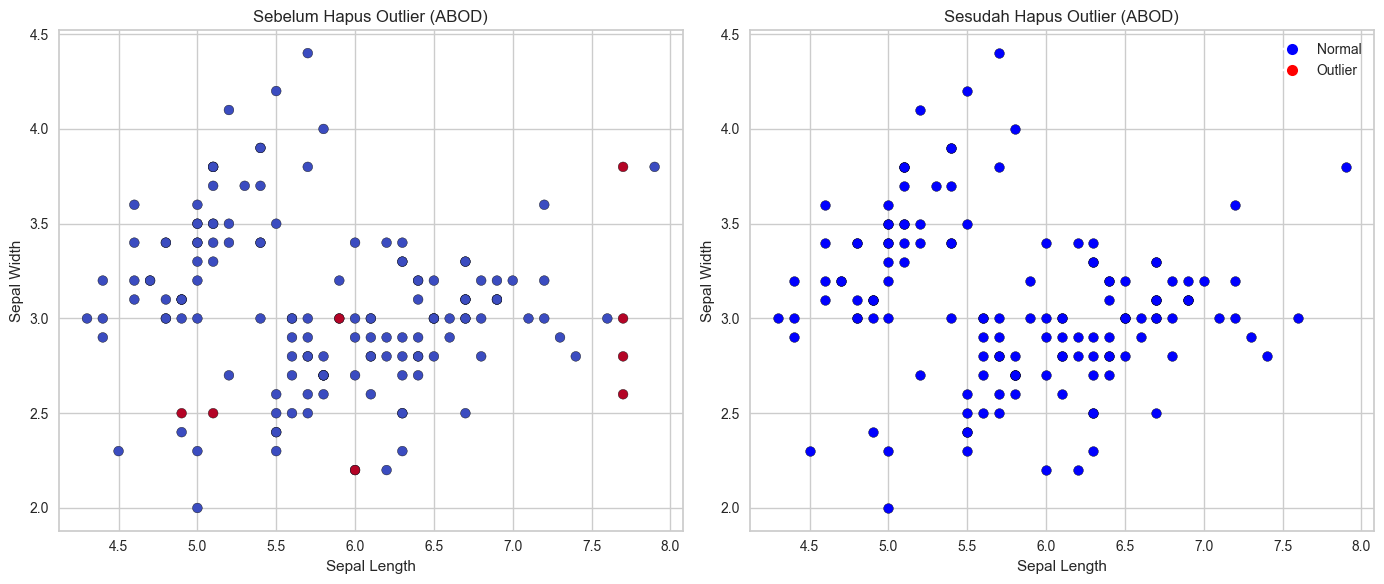

In [9]:
import pandas as pd
from pycaret.anomaly import *
import matplotlib.pyplot as plt

# copy dataset
dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

# buat model ABOD (ambil 5% data sebagai outlier)
abod = create_model('abod', fraction=0.05)

# assign hasil prediksi
results = assign_model(abod)

# pisahkan data normal
cleaned_data = results[results["Anomaly"] == 0].copy()

print("Data asli:", results.shape)
print("Data setelah hapus outlier:", cleaned_data.shape)

# buat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# sebelum hapus outlier
axes[0].scatter(
    results['sepallength'], results['sepalwidth'],
    c=results['Anomaly'], cmap='coolwarm', edgecolor='k'
)
axes[0].set_title("Sebelum Hapus Outlier (ABOD)")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")

# sesudah hapus outlier
axes[1].scatter(
    cleaned_data['sepallength'], cleaned_data['sepalwidth'],
    c='blue', edgecolor='k'
)
axes[1].set_title("Sesudah Hapus Outlier (ABOD)")
axes[1].set_xlabel("Sepal Length")
axes[1].set_ylabel("Sepal Width")

# legend manual
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Normal',
               markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Outlier',
               markerfacecolor='red', markersize=8)
]
plt.legend(handles=handles)

plt.tight_layout()
plt.show()


### Remove Data Outlier Hasil dari Metode KNN  

In [10]:
import pandas as pd
from pycaret.anomaly import *

# Load dataset
dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

# Setup PyCaret
knn_data = setup(data, session_id=123, normalize=True)

# Buat model KNN
knn = create_model('knn')

# Assign model ke dataset
knn_predictions = assign_model(knn)

# Cari index data outlier
data_anomaly_knn = knn_predictions[knn_predictions['Anomaly'] == 1].index

# Hapus data outlier
clean_data_knn = knn_predictions.drop(index=data_anomaly_knn)
print(clean_data_knn)


,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


      id           class  petallength  petalwidth  sepallength  sepalwidth  \
0      1     Iris-setosa          1.4         0.2          5.1         3.5   
1      2     Iris-setosa          1.4         0.2          4.9         3.0   
2      3     Iris-setosa          1.3         0.2          4.7         3.2   
3      4     Iris-setosa          1.5         0.2          4.6         3.1   
4      5     Iris-setosa          1.4         0.2          5.0         3.6   
..   ...             ...          ...         ...          ...         ...   
145  146  Iris-virginica          5.2         2.3          6.7         3.0   
146  147  Iris-virginica          5.0         1.9          6.3         2.5   
147  148  Iris-virginica          5.2         2.0          6.5         3.0   
148  149  Iris-virginica          5.4         2.3          6.2         3.4   
149  150  Iris-virginica          5.1         1.8          5.9         3.0   

     Anomaly  Anomaly_Score  
0          0       0.634739  
1  

Penjelasan Code:
- Import library → pandas, pycaret.anomaly.
- Copy dataset → data = dataset.copy().
- Setup data dengan setup().
- Buat model knn dengan create_model().
- Assign model ke dataset → assign_model(knn).
- Ambil index data outlier (Anomaly == 1).
- Drop outlier → dapat dataset bersih clean_data_knn

In [11]:
import pandas as pd
from pycaret.anomaly import *

data = dataset.copy()

knn_data = setup(data, session_id=123)
knn = create_model('knn')
knn_predictions = assign_model(knn)

#mencari index data outlier
data_anomaly = knn_predictions[knn_predictions['Anomaly'] == 1].index

#menghapus data outlier
clean_data_outlier = knn_predictions.drop(index=data_anomaly)
clean_data_outlier

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,id,class,petallength,petalwidth,sepallength,sepalwidth,Anomaly,Anomaly_Score
2,3,Iris-setosa,1.3,0.2,4.7,3.2,0,3.190611
3,4,Iris-setosa,1.5,0.2,4.6,3.1,0,3.018278
4,5,Iris-setosa,1.4,0.2,5.0,3.6,0,3.008322
5,6,Iris-setosa,1.7,0.4,5.4,3.9,0,3.190611
6,7,Iris-setosa,1.4,0.3,4.6,3.4,0,3.018278
...,...,...,...,...,...,...,...,...
143,144,Iris-virginica,5.9,2.3,6.8,3.2,0,3.019934
144,145,Iris-virginica,5.7,2.5,6.7,3.3,0,3.078961
145,146,Iris-virginica,5.2,2.3,6.7,3.0,0,3.074085
146,147,Iris-virginica,5.0,1.9,6.3,2.5,0,3.070831


![Screenshot](images/204806.png)  

Berdasarkan tabel di atas sisa data yang berhasil dibersihkan dari outlier yakni sebanyak 142 data.

Data asli (KNN):  (150, 8)
Data setelah hapus outlier (KNN):  (142, 8)


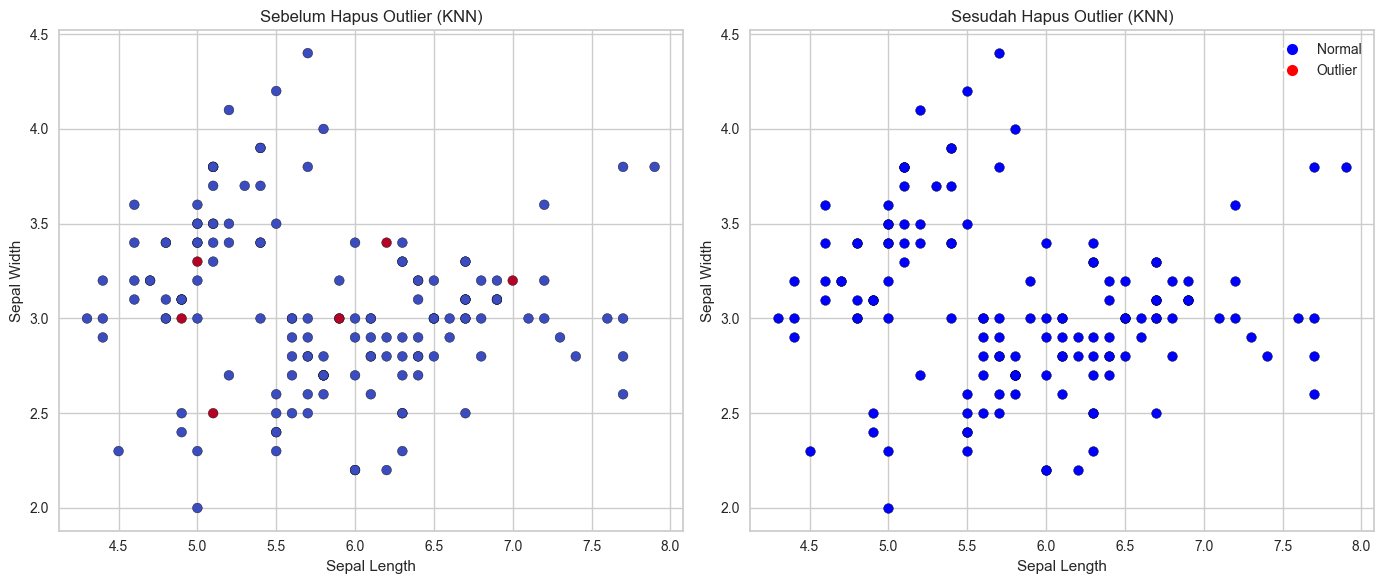

In [12]:
import pandas as pd
from pycaret.anomaly import * 
import matplotlib.pyplot as plt

# Load data
dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

# Model KNN
knn = create_model('knn')
results_knn = assign_model(knn)

# Data tanpa outlier
cleaned_knn = results_knn[results_knn["Anomaly"] == 0].copy()

print("Data asli (KNN): ", results_knn.shape)
print("Data setelah hapus outlier (KNN): ", cleaned_knn.shape)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Sebelum hapus outlier
axes[0].scatter(
    results_knn['sepallength'], results_knn['sepalwidth'],
    c=results_knn['Anomaly'], cmap='coolwarm', edgecolor='k'
)
axes[0].set_title("Sebelum Hapus Outlier (KNN)")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")

# Sesudah hapus outlier
axes[1].scatter(
    cleaned_knn['sepallength'], cleaned_knn['sepalwidth'],
    c='blue', edgecolor='k'
)
axes[1].set_title("Sesudah Hapus Outlier (KNN)")
axes[1].set_xlabel("Sepal Length")
axes[1].set_ylabel("Sepal Width")

# Legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Normal',
               markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Outlier',
               markerfacecolor='red', markersize=8)
]
plt.legend(handles=handles)

plt.tight_layout()
plt.show()


### Remove Data Outlier Hasil dari Metode LOF  

In [13]:
import pandas as pd
from pycaret.anomaly import *

dataset = pd.read_csv("data_gabungan_iris.csv")
data = dataset.copy()

lof_data = setup(data, session_id=123, normalize=True)
lof = create_model('lof')
lof_predictions = assign_model(lof)

#mencari index data outlier
data_anomaly = lof_predictions[lof_predictions['Anomaly'] == 1].index

#menghapus data outlier
clean_data_outlier = lof_predictions.drop(index=data_anomaly)
print(clean_data_outlier)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


      id           class  petallength  petalwidth  sepallength  sepalwidth  \
0      1     Iris-setosa          1.4         0.2          5.1         3.5   
1      2     Iris-setosa          1.4         0.2          4.9         3.0   
2      3     Iris-setosa          1.3         0.2          4.7         3.2   
3      4     Iris-setosa          1.5         0.2          4.6         3.1   
4      5     Iris-setosa          1.4         0.2          5.0         3.6   
..   ...             ...          ...         ...          ...         ...   
145  146  Iris-virginica          5.2         2.3          6.7         3.0   
146  147  Iris-virginica          5.0         1.9          6.3         2.5   
147  148  Iris-virginica          5.2         2.0          6.5         3.0   
148  149  Iris-virginica          5.4         2.3          6.2         3.4   
149  150  Iris-virginica          5.1         1.8          5.9         3.0   

     Anomaly  Anomaly_Score  
0          0       0.989666  
1  

Penjelasan Code:
- Import library → pandas, pycaret.anomaly.
- Copy dataset → data = dataset.copy().
- Setup data dengan setup().
- Buat model knn dengan create_model().
- Assign model ke dataset → assign_model(knn).
- Ambil index data outlier (Anomaly == 1).
- Drop outlier → dapat dataset bersih clean_data_knn

In [14]:
import pandas as pd
from pycaret.anomaly import *

data = dataset.copy()

lof_data = setup(data, session_id=123)
lof = create_model('lof')
lof_predictions = assign_model(lof)

#mencari index data outlier
data_anomaly = lof_predictions[lof_predictions['Anomaly'] == 1].index

#menghapus data outlier
clean_data_outlier = lof_predictions.drop(index=data_anomaly)
clean_data_outlier

,Description,Value
0,Session id,123
1,Original data shape,"(150, 6)"
2,Transformed data shape,"(150, 8)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,id,class,petallength,petalwidth,sepallength,sepalwidth,Anomaly,Anomaly_Score
4,5,Iris-setosa,1.4,0.2,5.0,3.6,0,1.126259
5,6,Iris-setosa,1.7,0.4,5.4,3.9,0,1.104792
6,7,Iris-setosa,1.4,0.3,4.6,3.4,0,1.087843
7,8,Iris-setosa,1.5,0.2,5.0,3.4,0,1.074591
8,9,Iris-setosa,1.4,0.2,4.4,2.9,0,1.066544
...,...,...,...,...,...,...,...,...
141,142,Iris-virginica,5.1,2.3,6.9,3.1,0,1.065260
142,143,Iris-virginica,5.1,1.9,5.8,2.7,0,1.073874
143,144,Iris-virginica,5.9,2.3,6.8,3.2,0,1.084718
144,145,Iris-virginica,5.7,2.5,6.7,3.3,0,1.102151


![Screenshot](images/205705.png)  

Berdasarkan tabel di atas sisa data yang berhasil dibersihkan dari outlier yakni sebanyak 142 data.  

Data asli (LOF):  (150, 8)
Data setelah hapus outlier (LOF):  (142, 8)


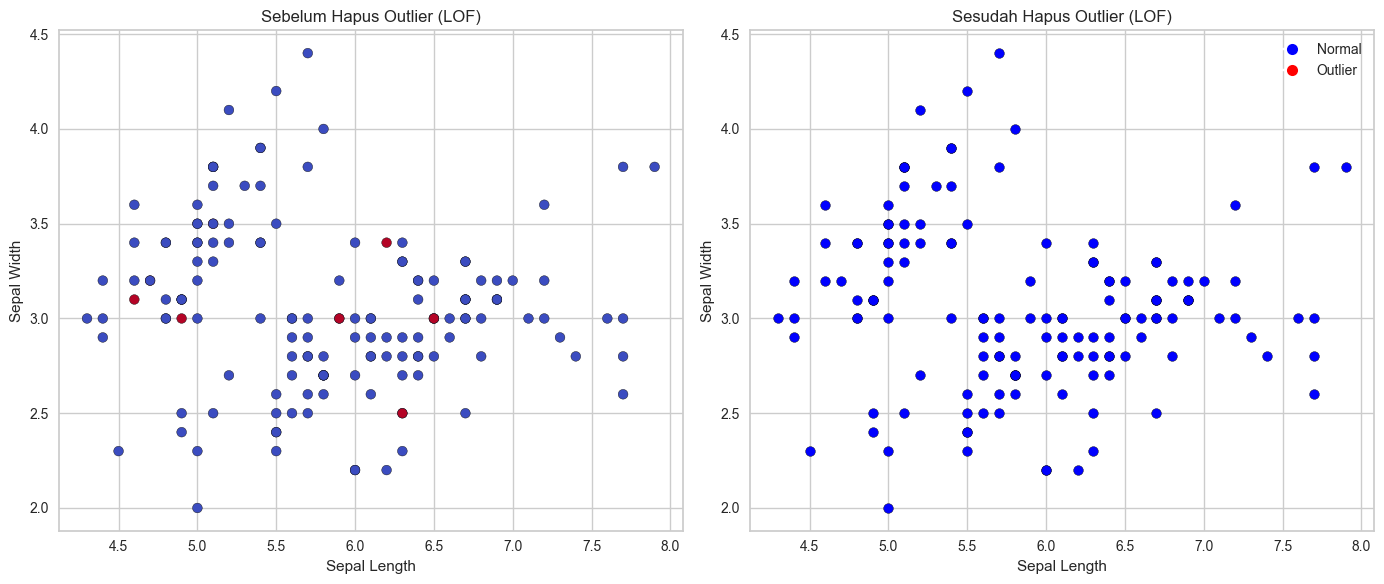

In [15]:
import pandas as pd
from pycaret.anomaly import * 
import matplotlib.pyplot as plt

# Load data
data = dataset.copy()

# Model LOF
lof = create_model('lof')
results_lof = assign_model(lof)

# Data tanpa outlier
cleaned_lof = results_lof[results_lof["Anomaly"] == 0].copy()

print("Data asli (LOF): ", results_lof.shape)
print("Data setelah hapus outlier (LOF): ", cleaned_lof.shape)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Sebelum hapus outlier
axes[0].scatter(
    results_lof['sepallength'], results_lof['sepalwidth'],
    c=results_lof['Anomaly'], cmap='coolwarm', edgecolor='k'
)
axes[0].set_title("Sebelum Hapus Outlier (LOF)")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")

# Sesudah hapus outlier
axes[1].scatter(
    cleaned_lof['sepallength'], cleaned_lof['sepalwidth'],
    c='blue', edgecolor='k'
)
axes[1].set_title("Sesudah Hapus Outlier (LOF)")
axes[1].set_xlabel("Sepal Length")
axes[1].set_ylabel("Sepal Width")

# Legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Normal',
               markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Outlier',
               markerfacecolor='red', markersize=8)
]
plt.legend(handles=handles)

plt.tight_layout()
plt.show()
